> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [ IMDB MOVIE - DATA SET ]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

# TMDB MOVIE DATA ANALYSIS

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


In [106]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


# Importing important packages

import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [107]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.

df_movies = pd.read_csv('tmdb-movies.csv')


In [108]:
df_movies.shape

(10866, 21)

**Shape of the Data**

>It can be seen that the TMDB movie data has initail rows of 10866 and colums of 21.

In [109]:
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [110]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> A list all column names in each table, and their significance with  the relationship between tables are explained in the table below ::

Serial | Field | Importance 
---  |  --- | --- 
1 | id      | primary key for data frame 
2 | imdb_id     |  key reference in imdb database
3 | popularity    | how well the movie was known by public
4 | budget   |  amount spent on the movie 
5 | revenue     |  amount of money made from the movie - reflects current figures
6 | original_title   |  movie title 
7 | cast  |  Actor and actresses listed in the order they appear in the credits and separated by |
8 | homepage   |  movie's website
9 | director  |  movie director  
10| tagline  |  popular catch theme for the movie
11| keywords   |  search, words
12| overview   |  summary of plot
13| runtime  |  lenghth of movie
14| genres   |   type of movie 
15| production_companies  |  Companies involved in production
16| release_date  |  date released
17| vote_count  |  No of votes for the movie
18| vote_average  |  movie ratings
19| release_year  | Year of release
20| budget_adj   | Adjusted budget to account for inflation
21| revenue_adj  | adjusted revenue to account for inflation


   

**Null Data Fields**
>It can be observed that tData fram has some fields with null values. The Fields are :
    1. imdb_id
    2. cast
    3. homepage
    4. director
    5. tagline
    6. keywords
    7. overview
    8. genres
    9. production_companies
    

In [111]:
#determine total number of each of empty fields across columns

result = df_movies[['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres', 'production_companies'
]].isnull().sum();

print(result);

imdb_id                   10
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
genres                    23
production_companies    1030
dtype: int64


In [112]:
#identification of data types

df_movies.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

# Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [113]:
# After discussing the structure of the data and any problems that need to be
# cleaned, perform those cleaning steps in the second part of this section.

### Missing Data

> The following fields have missing data which will be corrected as shown in the table below::

Serial | Field | Count of Missing Values | Data type  | Filling Values
---  |  --- | --- | --- | ---
1 | imdb_id             |       10    |   object  |  drop rows with NaN 
2 | cast                |       76    |   object  |  replace NaN with "No_dets"
3 | homepage            |     7930    |   object  |  replace NaN with "No_dets"
4 | director            |        44   |    object  | replace NaN with "No_dets"
5 | tagline             |     2824    |    object  |  replace NaN with "No_dets"
6 | keywords            |     1493    |  object  |    replace NaN with "No_dets"
7 | overview            |       4    |  object  |     replace NaN with "No_dets"
8 | genres              |      23    |  object  |     replace NaN with "No_dets"
9 | production_companies  |  1030    |  object  |     replace NaN with "No_dets"

### Handling Missing Data


In [114]:
#drop all rows with NaN imdb_id

df_movies.dropna(subset=['imdb_id'], inplace=True)



In [115]:
#all  the 10 identified imdb_id NaN rows deleted
df_movies.shape

(10856, 21)

In [116]:
#replace all other NaN values with No_dets

df_movies.fillna('no_dets', inplace=True)



In [117]:
df_movies.shape

(10856, 21)

### Duplicate Rows

In [1]:
#test for duplicate rows

dogx[dogx.duplicated(['tweet_id'], keep=F)].sort_values(by=['col_x'])



NameError: name 'dogx' is not defined

In [119]:
#display duplicated rows

df_dups = df_movies[df_movies.duplicated(keep=False)]

df_dups.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,no_dets,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,no_dets,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


### Handling Duplicate Rows

In [120]:
#drop duplicated rows

df_movies.drop_duplicates(inplace=True)

In [121]:
#duplicated row removed
df_movies.shape

(10855, 21)

### Fixing Data Structure & Types


In [122]:
#First observation is to make **imdb** id into string by deleting preceeding "tt" for performance efficiency.

df_movies['imdb_id'] = df_movies['imdb_id'].str.replace('tt', '')


In [123]:
#Also convert release_date to date format

df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])

In [124]:
df_movies.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

In [125]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 10865
Data columns (total 21 columns):
id                      10855 non-null int64
imdb_id                 10855 non-null object
popularity              10855 non-null float64
budget                  10855 non-null int64
revenue                 10855 non-null int64
original_title          10855 non-null object
cast                    10855 non-null object
homepage                10855 non-null object
director                10855 non-null object
tagline                 10855 non-null object
keywords                10855 non-null object
overview                10855 non-null object
runtime                 10855 non-null int64
genres                  10855 non-null object
production_companies    10855 non-null object
release_date            10855 non-null datetime64[ns]
vote_count              10855 non-null int64
vote_average            10855 non-null float64
release_year            10855 non-null int64
budget_adj   

### Cleaned Data

In [126]:
df_movies.head(20)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2015-06-23,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2015-06-17,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...

### End of Data Cleaning

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.



## Brief overview of the data

In [127]:
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10855.000000,10855.000000,1.085500e+04,1.085500e+04,10855.000000,10855.000000,10855.000000,10855.000000,1.085500e+04,1.085500e+04
mean,65959.191617,0.646832,1.463776e+07,3.986359e+07,102.105205,217.584155,5.973865,2001.313128,1.756606e+07,5.141632e+07
std,92018.246342,1.000591,3.092533e+07,1.170559e+08,31.348734,575.877532,0.934604,12.815672,3.431919e+07,1.446965e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10591.500000,0.207733,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20618.000000,0.383998,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75393.500000,0.714446,1.500000e+07,2.404727e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.374346e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [128]:
#Using top 500 rated  movies

df_movies.sort_values(by=['vote_average'], ascending=[False]).head(500)



,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,125336,2044056,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,http://www.channel4.com/programmes/the-story-o...,Mark Cousins,no_dets,...,"The Story of Film: An Odyssey, written and dir...",900,Documentary,no_dets,2011-09-03,14,9.2,2011,0.000000e+00,0.000000e+00
538,224972,3983674,0.114264,0,0,The Mask You Live In,no_dets,http://themaskyoulivein.org,Jennifer Siebel Newsom,"Is american masculinity harming our boys, men ...",...,"Compared to girls, research shows that boys in...",88,Documentary,no_dets,2015-01-01,11,8.9,2015,0.000000e+00,0.000000e+00
1200,374430,3973198,0.129531,0,0,Black Mirror: White Christmas,Jon Hamm|Rafe Spall|Oona Chaplin|Natalia Tena|...,no_dets,Carl Tibbetts,no_dets,...,This feature-length special consists of three ...,74,Drama|Horror|Mystery|Science Fiction|Thriller,no_dets,2014-12-16,41,8.8,2014,0.000000e+00,0.000000e+00
2269,51299,1828232,0.222293,0,0,Life Cycles,no_dets,http://www.lifecyclesfilm.com/,Derek Frankowski,no_dets,...,Life Cycles tells a spectacular story of the b...,47,Documentary,no_dets,2010-10-02,27,8.8,2010,0.000000e+00,0.000000e+00
6911,24970,0110758,0.212010,0,0,Pink Floyd: Pulse,David Gilmour|Nick Mason|Richard Wright|Sam Br...,no_dets,David Mallet,no_dets,...,Pulse (stylized as Pâ€¢Uâ€¢Lâ€¢Sâ€¢E) is a Pin...,145,Music,SMV Enterprises|Columbia Music Video|EMI,2006-07-09,23,8.7,2006,0.000000e+00,0.000000e+00
8839,16275,0251654,0.157001,0,0,Dave Chappelle: Killin' Them Softly,Dave Chappelle,no_dets,Stan Lathan,no_dets,...,Dave Chappelle returns for a stand-up to D.C. ...,57,Comedy,no_dets,2000-01-01,17,8.5,2000,0.000000e+00,0.000000e+00
8221,55676,0112120,0.194889,0,0,A Personal Journey with Martin Scorsese Throug...,Martin Scorsese|Brian De Palma|Gregory Peck|Fr...,no_dets,Martin Scorsese|Michael Henry Wilson,no_dets,...,Martin Scorsese celebrates American movies fro...,225,Documentary,Miramax Films|British Film Institute (BFI),1995-05-21,11,8.5,1995,0.000000e+00,0.000000e+00
8411,25093,1421377,0.302908,0,0,Queen - Rock Montreal,Freddie Mercury|Roger Taylor|John Deacon|Brian...,no_dets,Saul Swimmer,no_dets,...,The only Queen concert ever filmed in its enti...,138,Music,Edel records GmbH,1981-11-24,14,8.5,1981,0.000000e+00,0.000000e+00
5830,282848,2986512,0.248944,0,0,Doctor Who: The Time of the Doctor,Matt Smith|Jenna Coleman,no_dets,James Payne,A change is going to come...,...,"Orbiting a quiet backwater planet, the massed ...",60,no_dets,no_dets,2013-12-25,26,8.5,2013,0.000000e+00,0.000000e+00
3224,20313,1270491,0.224721,0,0,John Mayer: Where the Light Is Live in Los Ang...,John Mayer|Steve Jordan|Pino Palladino|David R...,no_dets,no_dets,no_dets,...,Where The Light Is: John Mayer Live in Los Ang...,164,Music,no_dets,2008-07-01,16,8.5,2008,0.000000e+00,0.000000e+00


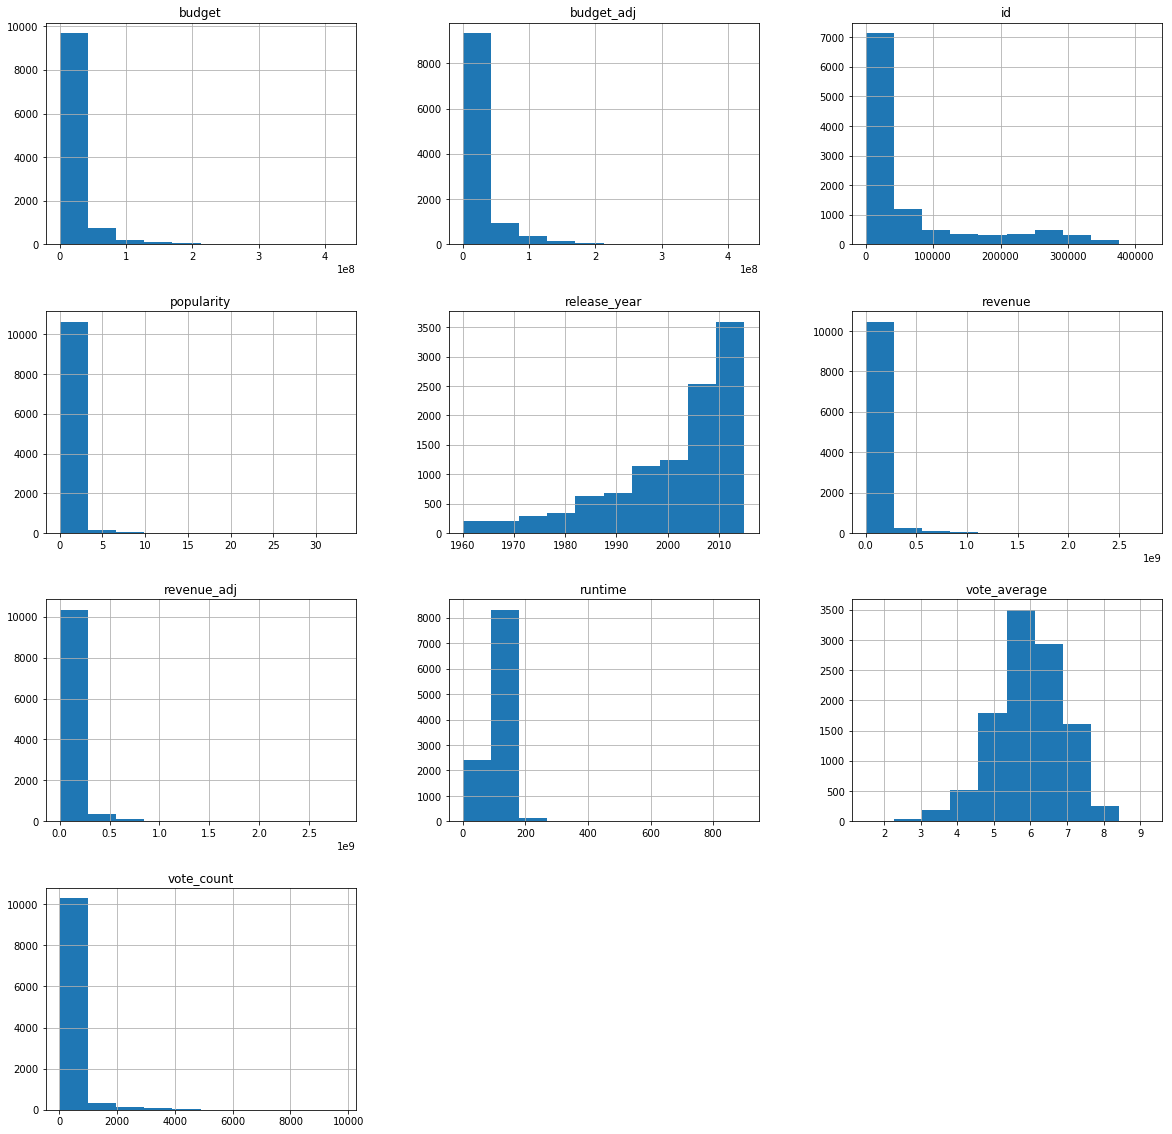

In [129]:
df_movies.hist(figsize = (20, 20));

**I seek to answer the following questions after reviewing the table ::**

>Research Question 1 - What are the top 10 most popular movies?

>Research Question 2 - What are the Highly Rated Movies?

>Research Question 3 - Correlation between popularity vs High-rating?

>Research Question 4 - What are the most profitable movies?

>Research Question 5 -   What Directors produce most  movies?

>Research Question 6 -   What Production Companies  produce most  movies?

>Research Question 6 -   What Production Companies  produce most  movies?

>Research Question 7 -   Movie release by year?

>Research Question 8 -  Profitable Production Companies?

>Research Question 9 -  High Rated Directors Production Companies?



### Research Question 1 - What are the top 10 most popular movies?

In [130]:
df_movies['popularity'].describe()

count    10855.000000
mean         0.646832
std          1.000591
min          0.000065
25%          0.207733
50%          0.383998
75%          0.714446
max         32.985763
Name: popularity, dtype: float64

In [131]:
#show top 10 movies in lot

df_popular = df_movies[["original_title","popularity"]]

df_popular.head()


,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
2,Insurgent,13.112507
3,Star Wars: The Force Awakens,11.173104
4,Furious 7,9.335014


In [132]:
df_pop10 = df_popular.sort_values(by=['popularity'], ascending=False).head(10)

df_pop10.head(10)

,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
629,Interstellar,24.949134
630,Guardians of the Galaxy,14.311205
2,Insurgent,13.112507
631,Captain America: The Winter Soldier,12.971027
1329,Star Wars,12.037933
632,John Wick,11.422751
3,Star Wars: The Force Awakens,11.173104
633,The Hunger Games: Mockingjay - Part 1,10.739009


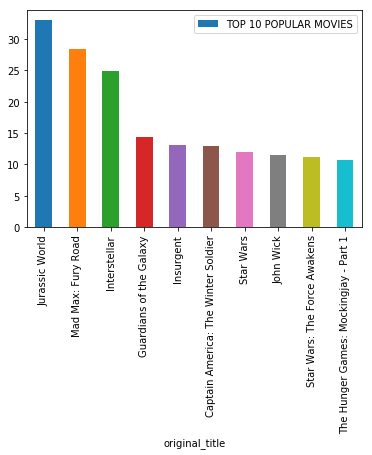

In [133]:
df_pop10.plot(x='original_title', y='popularity', kind = 'bar', label='TOP 10 POPULAR MOVIES');

### Research Question 2 - What are the Highly Rated Movies?

In [134]:
df_movies['vote_average'].describe()

count    10855.000000
mean         5.973865
std          0.934604
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

In [135]:
#show top 10 rated  movies in lot

df_toprated = df_movies[["original_title","vote_average"]]


In [136]:
df_top10 = df_toprated.sort_values(by=['vote_average'], ascending=[False]).head(10)

df_top10.head(10)

,original_title,vote_average
3894,The Story of Film: An Odyssey,9.2
538,The Mask You Live In,8.9
1200,Black Mirror: White Christmas,8.8
2269,Life Cycles,8.8
6911,Pink Floyd: Pulse,8.7
8839,Dave Chappelle: Killin' Them Softly,8.5
8221,A Personal Journey with Martin Scorsese Throug...,8.5
8411,Queen - Rock Montreal,8.5
5830,Doctor Who: The Time of the Doctor,8.5
3224,John Mayer: Where the Light Is Live in Los Ang...,8.5


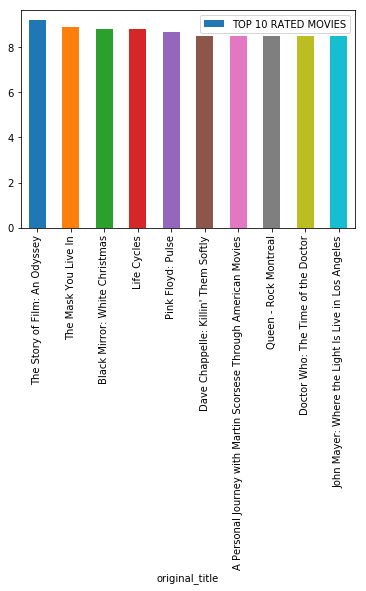

In [137]:
df_top10.plot(x='original_title', y='vote_average', kind = 'bar', label='TOP 10 RATED MOVIES');

### Research Question 3 - Correlation between popularity vs High-rating?

#### Using Scatter Plot to determine correlation

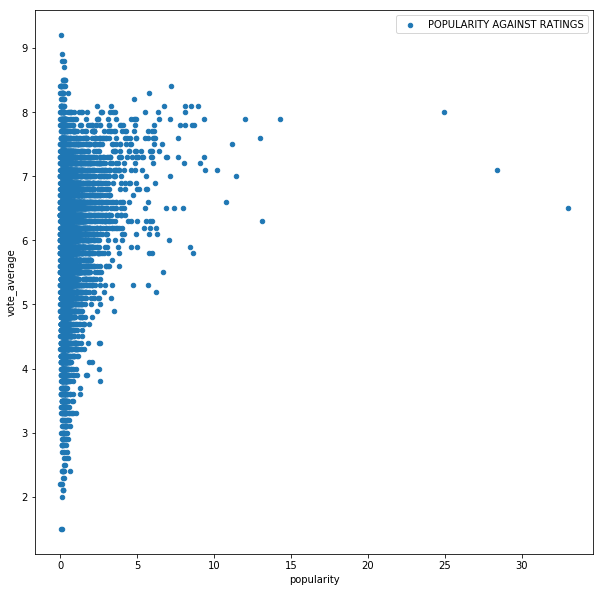

In [138]:
#General ScatterPlot
df_movies.plot.scatter(x='popularity',y='vote_average', figsize=(10,10), label='POPULARITY AGAINST RATINGS');

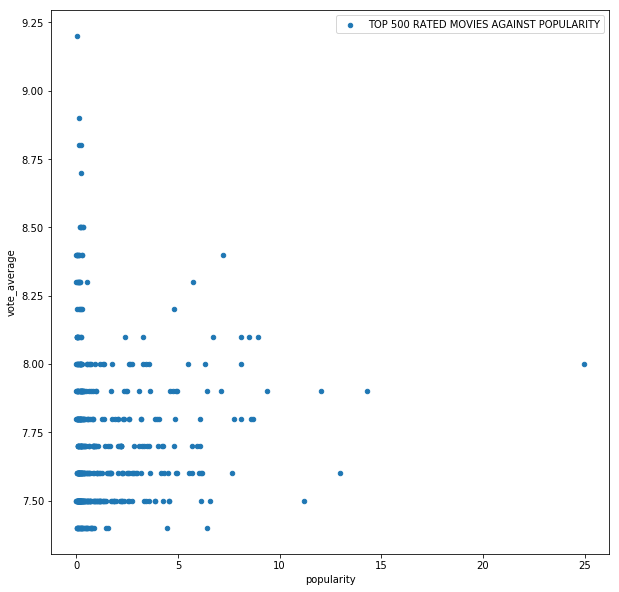

In [139]:
#Using top 500 rated  movies

df_poprated1 = df_movies.sort_values(by=['vote_average'], ascending=[False]).head(500)

df_poprated1.plot.scatter(x='popularity',y='vote_average', figsize=(10,10), label='TOP 500 RATED MOVIES AGAINST POPULARITY');



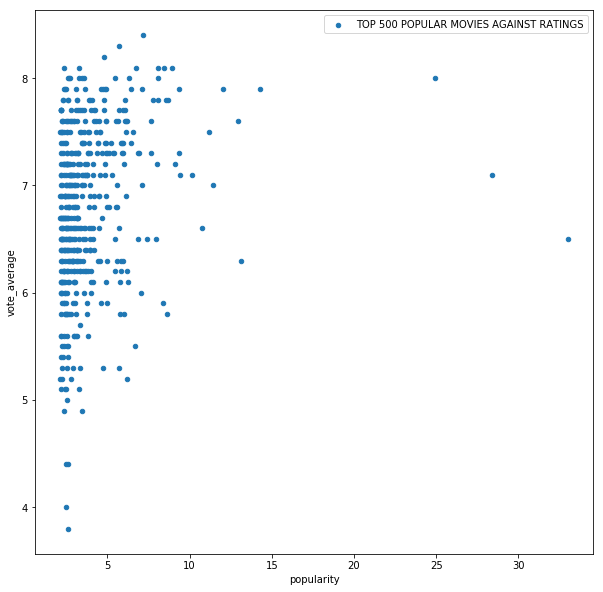

In [140]:
#Using top 500 rated  movies

df_poprated1 = df_movies.sort_values(by=['popularity'], ascending=[False]).head(500)

df_poprated1.plot.scatter(x='popularity',y='vote_average', figsize=(10,10), label='TOP 500 POPULAR MOVIES AGAINST RATINGS');

### Profit Calculations

In [141]:
#Calculating Profits

df_diff = df_movies['revenue_adj'] - df_movies['budget_adj']

df_diff.colums = ["Profit"]

df_det = df_movies[["original_title", "production_companies","director", "budget_adj", "revenue_adj" ]]

df_profit = pd.concat([df_det, df_diff], axis=1,  join='inner')

df_profit.columns = ['title', 'Company', 'director', 'budget', 'revenue', 'profit']

df_profit.head()

,title,Company,director,budget,revenue,profit
0,Jurassic World,Universal Studios|Amblin Entertainment|Legenda...,Colin Trevorrow,1.379999e+08,1.392446e+09,1.254446e+09
1,Mad Max: Fury Road,Village Roadshow Pictures|Kennedy Miller Produ...,George Miller,1.379999e+08,3.481613e+08,2.101614e+08
2,Insurgent,Summit Entertainment|Mandeville Films|Red Wago...,Robert Schwentke,1.012000e+08,2.716190e+08,1.704191e+08
3,Star Wars: The Force Awakens,Lucasfilm|Truenorth Productions|Bad Robot,J.J. Abrams,1.839999e+08,1.902723e+09,1.718723e+09
4,Furious 7,Universal Pictures|Original Film|Media Rights ...,James Wan,1.747999e+08,1.385749e+09,1.210949e+09


### Research Question 4 -   What are the most profitable movies?

In [142]:
df_profitmovies = df_profit.sort_values(by=['profit'], ascending=[False]).head(10)

df_profitmovies.head(10)

,title,Company,director,budget,revenue,profit
1329,Star Wars,Lucasfilm|Twentieth Century Fox Film Corporation,George Lucas,3.957559e+07,2.789712e+09,2.750137e+09
1386,Avatar,Ingenious Film Partners|Twentieth Century Fox ...,James Cameron,2.408869e+08,2.827124e+09,2.586237e+09
5231,Titanic,Paramount Pictures|Twentieth Century Fox Film ...,James Cameron,2.716921e+08,2.506406e+09,2.234714e+09
10594,The Exorcist,Warner Bros.|Hoya Productions,William Friedkin,3.928928e+07,2.167325e+09,2.128036e+09
9806,Jaws,Universal Pictures|Zanuck/Brown Productions,Steven Spielberg,2.836275e+07,1.907006e+09,1.878643e+09
8889,E.T. the Extra-Terrestrial,Universal Pictures|Amblin Entertainment,Steven Spielberg,2.372625e+07,1.791694e+09,1.767968e+09
3,Star Wars: The Force Awakens,Lucasfilm|Truenorth Productions|Bad Robot,J.J. Abrams,1.839999e+08,1.902723e+09,1.718723e+09
8094,The Net,Columbia Pictures,Irwin Winkler,3.148127e+07,1.583050e+09,1.551568e+09
10110,One Hundred and One Dalmatians,Walt Disney Productions,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,2.917944e+07,1.574815e+09,1.545635e+09
7309,The Empire Strikes Back,Lucasfilm|Twentieth Century Fox Film Corporation,Irvin Kershner,4.762866e+07,1.424626e+09,1.376998e+09


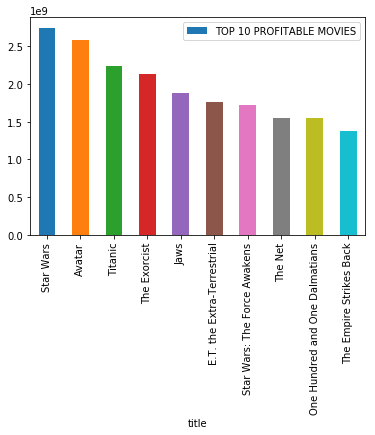

In [143]:
df_profitmovies.plot(x='title', y='profit', kind = 'bar', label='TOP 10 PROFITABLE MOVIES');

### Research Question 5 -   What Directors produce most  movies?

In [144]:
#No of movies per director

df_movies['director'].value_counts()


Woody Allen                                          45
no_dets                                              40
Clint Eastwood                                       34
Steven Spielberg                                     29
Martin Scorsese                                      29
Ridley Scott                                         23
Ron Howard                                           22
Steven Soderbergh                                    22
Joel Schumacher                                      21
Brian De Palma                                       20
Barry Levinson                                       19
Tim Burton                                           19
Wes Craven                                           19
David Cronenberg                                     18
John Carpenter                                       18
Mike Nichols                                         18
Rob Reiner                                           18
Oliver Stone                                    

### Research Question 6 -   What Production Companies  produce most  movies?

In [145]:
df_movies['production_companies'].value_counts(sort = 'ascending')


no_dets                                                                                                           1025
Paramount Pictures                                                                                                 156
Universal Pictures                                                                                                 133
Warner Bros.                                                                                                        84
Walt Disney Pictures                                                                                                76
Columbia Pictures                                                                                                   72
Metro-Goldwyn-Mayer (MGM)                                                                                           72
New Line Cinema                                                                                                     61
Touchstone Pictures                             

### Research Question 7 -   Movie release by year?

In [146]:
df_movies['release_year'].value_counts()


2014    699
2013    658
2015    628
2012    586
2011    540
2009    531
2008    496
2010    488
2007    436
2006    408
2005    364
2004    307
2003    281
2002    266
2001    242
2000    227
1999    224
1998    210
1996    204
1997    192
1994    184
1993    178
1995    175
1988    145
1989    137
1992    133
1991    133
1990    132
1987    125
1986    121
1985    109
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1979     57
1977     57
1971     55
1973     55
1974     47
1976     47
1966     46
1975     44
1964     42
1970     41
1967     40
1972     40
1968     39
1965     35
1963     34
1962     32
1960     32
1969     31
1961     31
Name: release_year, dtype: int64

### Research Question 8 -  Profitable Production Companies?

In [147]:
df_profitmovies = df_profit.sort_values(by=['profit'], ascending=[False]).head(10)

df_profitcomp = df_profitmovies[['Company', 'profit']]
df_profitcomp.head()


,Company,profit
1329,Lucasfilm|Twentieth Century Fox Film Corporation,2.750137e+09
1386,Ingenious Film Partners|Twentieth Century Fox ...,2.586237e+09
5231,Paramount Pictures|Twentieth Century Fox Film ...,2.234714e+09
10594,Warner Bros.|Hoya Productions,2.128036e+09
9806,Universal Pictures|Zanuck/Brown Productions,1.878643e+09


In [148]:
df_profitcomps = df_profitcomp.groupby('Company').sum()

df_profitcomps.sort_values(by=['profit'], ascending=[False]).head(10)

,profit
Company,
Lucasfilm|Twentieth Century Fox Film Corporation,4.127134e+09
Ingenious Film Partners|Twentieth Century Fox Film Corporation|Dune Entertainment|Lightstorm Entertainment,2.586237e+09
Paramount Pictures|Twentieth Century Fox Film Corporation|Lightstorm Entertainment,2.234714e+09
Warner Bros.|Hoya Productions,2.128036e+09
Universal Pictures|Zanuck/Brown Productions,1.878643e+09
Universal Pictures|Amblin Entertainment,1.767968e+09
Lucasfilm|Truenorth Productions|Bad Robot,1.718723e+09
Columbia Pictures,1.551568e+09
Walt Disney Productions,1.545635e+09


### Research Question 9 -  High Rated Directors Production Companies?

In [149]:
df_directorratings = df_movies[['director', 'vote_average']]

In [150]:
df_directorrated = df_directorratings.groupby('director').sum()

df_directorrated.sort_values(by=['vote_average'], ascending=[False]).head(10)

,vote_average
director,
Woody Allen,290.0
no_dets,270.5
Clint Eastwood,221.3
Martin Scorsese,201.8
Steven Spielberg,197.9
Ridley Scott,149.0
Ron Howard,140.3
Steven Soderbergh,135.8
Brian De Palma,127.1


### Limitations

> Most Fields were missing and can greatly affect certain ranking and ratings for the analysis made.

### Summary

> Most popular movie is "Jurrasic World"

> Most Highly rated movie is "The Story of Film: An Odyssey"

> No correlation between popular movie and highly rated movies

> Profitable Movie was "Star Wars" produced by  Lucasfilm|Twentieth Century Fox Film Corporation.

> Lucasfilm|Twentieth Century Fox Film Corporation is the most profitable production company within the period.

> Paramount Pictures produced highest number of movies totalling 156.

> DDirecor Woody Allen produced the most movies

> Director Woody Allen can be concluded with the Director with highest aggregate movie ratings.

> 2014 recorded highest number of movies totalling 699 movies



<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [151]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0